In [1]:
import requests
import pandas as pd
import bs4

from bs4 import BeautifulSoup
import re

In [2]:
#df = pd.read_csv('Public Script Sources - public_scripts.csv')

In [3]:
def scrape_webpage(url): #rename function to be more meaningful
    response = requests.get(url)
    html_string = response.text
    return html_string


In [4]:
url = 'https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/'

In [5]:
content = scrape_webpage(url)
soup = BeautifulSoup(content, "html.parser")
links = soup.find_all('a')

In [6]:
text_meta = soup.text.split()[6:-4]

In [7]:
name = text_meta[::4]
years = text_meta[1::4]
times = text_meta[2::4]
volumes = text_meta[3::4]

In [8]:
data = []
for i in range(len(name)):
    dict_ = {'text_name':name[i],
            'Year':years[i],
            'Time':times[i],
            'Volume':volumes[i]}
    data.append(dict_)
    

In [9]:
#data

In [10]:
humanist_vols = pd.DataFrame.from_dict(data)

In [11]:
humanist_vols

text_name         Year   Time   Volume
0   humanist.1987-1988.txt  26-Oct-2018  11:09  2354980
1   humanist.1988-1989.txt  26-Oct-2018  11:09  1535924
2   humanist.1989-1990.txt  26-Oct-2018  11:09  4663437
3   humanist.1990-1991.txt  26-Oct-2018  11:09  4973851
4   humanist.1991-1992.txt  26-Oct-2018  11:09  3243062
5   humanist.1992-1993.txt  26-Oct-2018  11:09  2934777
6   humanist.1993-1994.txt  26-Oct-2018  11:09  2776195
7   humanist.1994-1995.txt  26-Oct-2018  11:09  1739016
8   humanist.1995-1996.txt  26-Oct-2018  11:09  2494851
9   humanist.1996-1997.txt  26-Oct-2018  11:09  2109480
10  humanist.1997-1998.txt  26-Oct-2018  11:09  3678774
11  humanist.1998-1999.txt  26-Oct-2018  11:09  2907550
12  humanist.1999-2000.txt  26-Oct-2018  11:09  2652849
13  humanist.2000-2001.txt  26-Oct-2018  11:09  3232307
14  humanist.2001-2002.txt  26-Oct-2018  11:09  2634930
15  humanist.2002-2003.txt  26-Oct-2018  11:09  2419876
16  humanist.2003-2004.txt  26-Oct-2018  11:09  2834023
17  humanist.2004-2005.txt  26-Oct-2018  11:09  2718227
18  humanist.2005-2006.txt  26-Oct-2018  11:09  2665694
19  humanist.2006-2007.txt  26-Oct-2018  11:09  2238595
20  humanist.2007-2008.txt  26-Oct-2018  11:09  1868483

In [12]:
humanist_vols.to_csv('web_scraped_humanist_listserv.csv')

In [2]:
df1 = pd.read_csv('character_list5.csv',encoding='latin-1')
df2 = pd.read_csv('character_mapping.csv',encoding='latin-1')
df3 = pd.read_csv('meta_data7.csv',encoding='latin-1')

In [3]:
df1.dropna(inplace=True)
df1.head(5)

script_id imdb_character_name  words gender   age
0        280               betty    311      f  35.0
3        280     francesca johns   2251      f  46.0
4        280               madge    190      f  46.0
5        280     michael johnson    723      m  38.0
6        280      robert kincaid   1908      m  65.0

In [4]:
df2.dropna(inplace=True)
df2.head(5)

script_id    imdb_id character_from_script  \
0          1  tt0147800                bianca   
1          1  tt0147800               cameron   
2          1  tt0147800              chastity   
3          1  tt0147800                  joey   
4          1  tt0147800                   kat   

  closest_character_name_from_imdb_match closest_imdb_character_id  
0                       bianca stratford                 nm0646351  
1                          cameron james                 nm0330687  
2                               chastity                 nm0005517  
3                            joey donner                 nm0005080  
4                          kat stratford                 nm0005466

In [8]:
df3.dropna(inplace=True)
df3.head(5)

script_id    imdb_id                       title  year  gross  \
0       1534  tt1022603        (500) Days of Summer  2009   37.0   
1       1512  tt0147800  10 Things I Hate About You  1999   65.0   
3       1517  tt2024544            12 Years a Slave  2013   60.0   
4       1520  tt1542344                   127 Hours  2010   20.0   
5       6537  tt0450385                        1408  2007   91.0   

                                          lines_data  
0  7435445256774774443342577775657744434444564456...  
1  1777752320274533344457777722433777334443764677...  
3  4567334777777777777777447777756477777444777777...  
4                     453513352345765766777777773340  
5       37677777777777777776777737566646444336777661

In [13]:
df3['lines'] = [len(item) for item in df3['lines_data']]

In [14]:
df3

script_id    imdb_id                       title  year  gross  \
0          1534  tt1022603        (500) Days of Summer  2009   37.0   
1          1512  tt0147800  10 Things I Hate About You  1999   65.0   
3          1517  tt2024544            12 Years a Slave  2013   60.0   
4          1520  tt1542344                   127 Hours  2010   20.0   
5          6537  tt0450385                        1408  2007   91.0   
...         ...        ...                         ...   ...    ...   
1994       5517  tt3312830                       Youth  2015    2.0   
1995       3765  tt0403702             Youth in Revolt  2009   17.0   
1996       3766  tt1790885            Zero Dark Thirty  2012  104.0   
1997       8158  tt0120906                 Zero Effect  1998    3.0   
1999       6491  tt0443706                      Zodiac  2007   41.0   

                                             lines_data  lines  
0     7435445256774774443342577775657744434444564456...    255  
1     1777752320274533344457777722433777334443764677...    255  
3     4567334777777777777777447777756477777444777777...    109  
4                        453513352345765766777777773340     30  
5          37677777777777777776777737566646444336777661     44  
...                                                 ...    ...  
1994  7777777743477777777777777777777654336667757777...     83  
1995  7766777656545344243247443314443342644634343374...    255  
1996  5677677556654467677515744741445336433333000120...     96  
1997  4777774477777647777777777755677755423677777777...    119  
1999  2447767766763567777777777777777766777777777777...    150  

[1662 rows x 7 columns]

In [19]:
film_years = df3.groupby('year')

In [25]:
grouped_films = df3.groupby('year')['lines'].sum().reset_index()

In [27]:
grouped_films

year  lines
0   1931     58
1   1939    270
2   1949    174
3   1954    340
4   1958    160
5   1959    227
6   1960     75
7   1966    150
8   1967     73
9   1968    144
10  1970    123
11  1971     83
12  1972    292
13  1973    332
14  1974    240
15  1975    208
16  1976    182
17  1977    346
18  1978    256
19  1979    608
20  1980    854
21  1981    622
22  1982   1652
23  1983   1066
24  1984   1617
25  1985   1585
26  1986   2189
27  1987   3123
28  1988   2021
29  1989   3864
30  1990   3164
31  1991   3618
32  1992   4293
33  1993   4540
34  1994   4123
35  1995   6483
36  1996   5577
37  1997   7829
38  1998   8250
39  1999  10732
40  2000   7529
41  2001   7291
42  2002   5364
43  2003   4482
44  2004   5091
45  2005   5618
46  2006   4423
47  2007   6130
48  2008   8356
49  2009  10819
50  2010   8525
51  2011   8468
52  2012   5829
53  2013   6485
54  2014   7094
55  2015   4752

<AxesSubplot:>

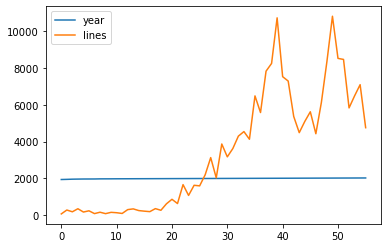

In [32]:
grouped_films.plot.line()